In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv('train_set.csv')

In [4]:
df_test=pd.read_csv('test_set.csv')

In [5]:
df_train.head(20)

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1000027,2016-08-13,2016-08-14,8183,desktop,7168,Elbonia,Gondal,1000027_1
1,1000027,2016-08-14,2016-08-16,15626,desktop,7168,Elbonia,Gondal,1000027_1
2,1000027,2016-08-16,2016-08-18,60902,desktop,7168,Elbonia,Gondal,1000027_1
3,1000027,2016-08-18,2016-08-21,30628,desktop,253,Elbonia,Gondal,1000027_1
4,1000033,2016-04-09,2016-04-11,38677,mobile,359,Gondal,Cobra Island,1000033_1
5,1000033,2016-04-11,2016-04-12,52089,desktop,384,Gondal,Cobra Island,1000033_1
6,1000033,2016-04-12,2016-04-14,21328,desktop,384,Gondal,Cobra Island,1000033_1
7,1000033,2016-04-14,2016-04-16,27485,desktop,384,Gondal,Cobra Island,1000033_1
8,1000033,2016-04-16,2016-04-19,38677,desktop,384,Gondal,Cobra Island,1000033_1
9,1000045,2016-06-18,2016-06-20,64876,desktop,2790,The Devilfire Empire,Fook Island,1000045_1


In [6]:
df_test.head(20)

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,city_id,hotel_country
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,56430,Urkesh
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,41971,Urkesh
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,5797,Urkesh
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,0,NaN
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,50075,The Devilfire Empire
5,1000270,2016-02-09,2016-02-10,desktop,116,The Devilfire Empire,1000270_1,29207,Cobra Island
6,1000270,2016-02-10,2016-02-19,desktop,9924,The Devilfire Empire,1000270_1,44768,Cobra Island
7,1000270,2016-02-19,2016-02-20,desktop,9924,The Devilfire Empire,1000270_1,0,NaN
8,1000441,2016-05-29,2016-06-01,desktop,9924,Bartovia,1000441_1,47759,Osterlich
9,1000441,2016-06-01,2016-06-02,desktop,9924,Bartovia,1000441_1,46411,Osterlich


In [15]:
from io import StringIO
import qgrid

In [16]:
#!pip install qgrid

In [11]:
df=pd.DataFrame(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166835 entries, 0 to 1166834
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   user_id         1166835 non-null  int64 
 1   checkin         1166835 non-null  object
 2   checkout        1166835 non-null  object
 3   city_id         1166835 non-null  int64 
 4   device_class    1166835 non-null  object
 5   affiliate_id    1166835 non-null  int64 
 6   booker_country  1166835 non-null  object
 7   hotel_country   1166835 non-null  object
 8   utrip_id        1166835 non-null  object
dtypes: int64(3), object(6)
memory usage: 80.1+ MB


In [23]:
print("Number of Unique Customers: ","\t\t",df_train['user_id'].nunique())
print("Number of Total Trips: ","\t\t",df_train['utrip_id'].nunique())
print("Number of Unique Cities: ","\t\t",df_train['city_id'].nunique())
print("Number of Unique Country of Origin: ","\t",df_train['booker_country'].nunique())
print("Number of Unique Destination Country: ","\t",df_train['hotel_country'].nunique())

Number of Unique Customers:  		 200153
Number of Total Trips:  		 217686
Number of Unique Cities:  		 39901
Number of Unique Country of Origin:  	 5
Number of Unique Destination Country:  	 195


In [24]:
print("Number of Unique Customers: ","\t\t",df_test['user_id'].nunique())
print("Number of Total Trips: ","\t\t",df_test['utrip_id'].nunique())
print("Number of Unique Cities: ","\t\t",df_test['city_id'].nunique())
print("Number of Unique Country of Origin: ","\t",df_test['booker_country'].nunique())
print("Number of Unique Destination Country: ","\t",df_test['hotel_country'].nunique())

Number of Unique Customers:  		 68502
Number of Total Trips:  		 70662
Number of Unique Cities:  		 21305
Number of Unique Country of Origin:  	 5
Number of Unique Destination Country:  	 167


In [38]:
# Group the data by user_id and count the number of trips for each user
# Group the data by user_id and count the number of unique trips for each user
trips_by_user = df_train.groupby('user_id')['utrip_id'].nunique().reset_index(name='trip_count')

# View the resulting dataframe
print(trips_by_user)

        user_id  trip_count
0            29           1
1            81           1
2           136           2
3           149           1
4           156           1
...         ...         ...
200148  6257979           1
200149  6258017           1
200150  6258041           1
200151  6258065           1
200152  6258087           1

[200153 rows x 2 columns]


In [39]:
trips_by_user=trips_by_user.sort_values('trip_count', ascending=False)

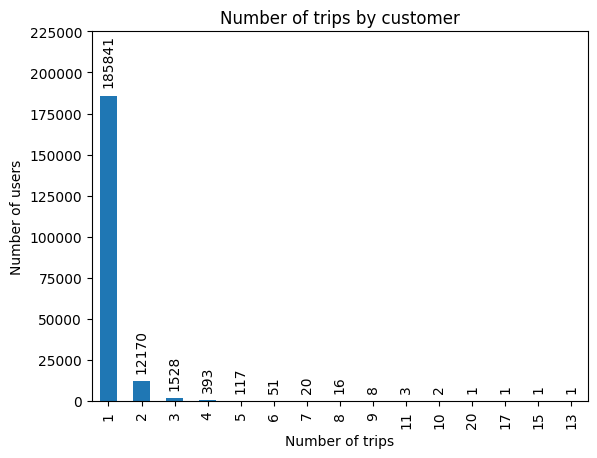

In [79]:
trip_counts = trips_by_user['trip_count'].value_counts()

# Create a bar plot of trip_counts
trip_counts.plot(kind='bar')

# Add a title to the plot
plt.title('Number of trips by customer')

# Add labels to the x-axis and y-axis
plt.xlabel('Number of trips')
plt.ylabel('Number of users')
plt.ylim(0, 225000)
# Add values to the bars
for index, value in enumerate(trip_counts):
    plt.text(index, value+5000, str(value), va='bottom', ha='center',rotation=90)

# Show the plot
plt.show()


In [80]:
df_train['city_id'].value_counts()

47499    11242
23921    10511
36063     9559
17013     9011
29319     8179
         ...  
10377        1
54696        1
4028         1
41726        1
5692         1
Name: city_id, Length: 39901, dtype: int64

In [23]:
city_counts = df_train['city_id'].value_counts()


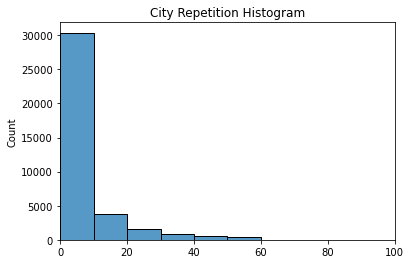

In [33]:
# Create a histogram of city_counts
sns.histplot(data=city_counts, x=city_counts.values, bins=[0,10,20,30,40,50,60])
plt.xlim(0,100)
plt.title('City Repetition Histogram')
# Show the plot
plt.show()

In [34]:
city_counts_filtered = city_counts[city_counts > 10]

In [35]:
city_counts_filtered

47499    11242
23921    10511
36063     9559
17013     9011
29319     8179
         ...  
62224       11
18527       11
21563       11
9547        11
7163        11
Name: city_id, Length: 8875, dtype: int64

In [36]:
#convert checkin chechout to date time
df_train.checkin=pd.to_datetime(df_train.checkin.to_numpy(), infer_datetime_format=True)
df_train.checkout=pd.to_datetime(df_train.checkout.to_numpy(), infer_datetime_format=True)

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166835 entries, 0 to 1166834
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1166835 non-null  int64         
 1   checkin         1166835 non-null  datetime64[ns]
 2   checkout        1166835 non-null  datetime64[ns]
 3   city_id         1166835 non-null  int64         
 4   device_class    1166835 non-null  object        
 5   affiliate_id    1166835 non-null  int64         
 6   booker_country  1166835 non-null  object        
 7   hotel_country   1166835 non-null  object        
 8   utrip_id        1166835 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 80.1+ MB


In [37]:
df_train['checkin_month'] = pd.to_datetime(df_train['checkin']).dt.month

In [38]:
df_train['checkout_month'] = pd.to_datetime(df_train['checkout']).dt.month

In [39]:
df_test['checkin_month'] = pd.to_datetime(df_test['checkin']).dt.month
df_test['checkout_month'] = pd.to_datetime(df_test['checkout']).dt.month

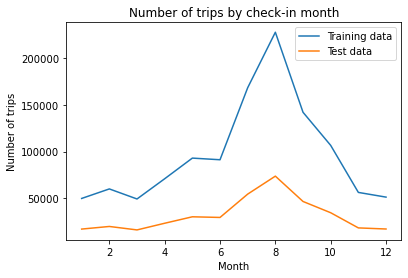

In [40]:
# Group the data by checkin_month and utrip_id and count the number of rows in each group
trips_by_month_train = df_train.groupby(['checkin_month', 'utrip_id']).size().reset_index(name='trip_count')
trips_by_month_test = df_test.groupby(['checkin_month', 'utrip_id']).size().reset_index(name='trip_count')


# Aggregate the data by checkin_month and sum the trip_counts
trips_by_month_train = trips_by_month_train.groupby('checkin_month').sum()
trips_by_month_test = trips_by_month_test.groupby('checkin_month').sum()

# Plot the trip_count data for both datasets on the same chart
plt.plot(trips_by_month_train.index, trips_by_month_train['trip_count'], label='Training data')
plt.plot(trips_by_month_test.index, trips_by_month_test['trip_count'], label='Test data')

# Add a legend to the plot
plt.legend()

# Add a title to the plot
plt.title('Number of trips by check-in month')

# Add labels to the x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Number of trips')

# Show the plot
plt.show()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,checkin_month,checkout_month
0,1000027,2016-08-13,2016-08-14,8183,desktop,7168,Elbonia,Gondal,1000027_1,8,8
1,1000027,2016-08-14,2016-08-16,15626,desktop,7168,Elbonia,Gondal,1000027_1,8,8
2,1000027,2016-08-16,2016-08-18,60902,desktop,7168,Elbonia,Gondal,1000027_1,8,8
3,1000027,2016-08-18,2016-08-21,30628,desktop,253,Elbonia,Gondal,1000027_1,8,8
4,1000033,2016-04-09,2016-04-11,38677,mobile,359,Gondal,Cobra Island,1000033_1,4,4
...,...,...,...,...,...,...,...,...,...,...,...
1166830,999855,2016-05-01,2016-05-02,20345,mobile,359,Gondal,Fook Island,999855_1,5,5
1166831,999944,2016-06-23,2016-06-24,17944,desktop,4541,Gondal,Glubbdubdrib,999944_1,6,6
1166832,999944,2016-06-24,2016-06-27,47075,desktop,2322,Gondal,Glubbdubdrib,999944_1,6,6
1166833,999944,2016-06-27,2016-06-29,228,desktop,384,Gondal,Glubbdubdrib,999944_1,6,6


In [41]:
# Calculate the day of the week for each checkin date
df_train['checkin_day'] = df_train['checkin'].apply(lambda x: x.weekday())
df_train['checkout_day'] = df_train['checkout'].apply(lambda x: x.weekday())

In [42]:
#convert checkin chechout to date time
df_test.checkin=pd.to_datetime(df_test.checkin.to_numpy(), infer_datetime_format=True)
df_test.checkout=pd.to_datetime(df_test.checkout.to_numpy(), infer_datetime_format=True)

In [43]:
# Calculate the day of the week for each checkin date
df_test['checkin_day'] = df_test['checkin'].apply(lambda x: x.weekday())
df_test['checkout_day'] = df_test['checkout'].apply(lambda x: x.weekday())

In [44]:
#exposrt test data for final text later
df_test.to_csv('final_test.csv')

In [45]:
city_counts_filtered.index

Int64Index([47499, 23921, 36063, 17013, 29319, 64876, 55128, 17127,  2416,
            66648,
            ...
            44402, 58873, 20856, 56844, 63707, 62224, 18527, 21563,  9547,
             7163],
           dtype='int64', length=8875)

In [46]:
filtered_trips=df_train[df_train['city_id'].isin(city_counts_filtered.index)]['utrip_id'].unique()

In [47]:
filtered_trips

array(['1000027_1', '1000033_1', '1000045_1', ..., '999842_1', '999855_1',
       '999944_1'], dtype=object)

In [48]:
filtered_df=df_train[df_train['utrip_id'].isin(filtered_trips)]

In [49]:
filtered_df.drop(['user_id','device_class','affiliate_id'], axis=1, inplace=True)

C:\Users\Junaid\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
# Group the data by trip_id and count the number of cities for trip
cities_in_trip = filtered_df.groupby('utrip_id').size().reset_index(name='cities_in_trip')

In [54]:
cities_in_trip.sort_values('cities_in_trip', ascending=False)

,utrip_id,cities_in_trip
101266,3635431_3,48
46528,2209265_10,45
127996,433188_8,44
46531,2209265_15,41
162891,5231140_3,41
...,...,...
149793,4898528_1,1
161479,5195238_7,1
213986,924286_1,1
170877,5437876_2,1


In [55]:
# Select trips with more than 2 cities but less than 11 cities
selected_trips = cities_in_trip[cities_in_trip['cities_in_trip'].between(3, 5, inclusive='both')]['utrip_id']

In [56]:
selected_trips

0         1000027_1
1         1000033_1
3         1000083_1
4          100008_1
6         1000136_1
            ...    
216966     999755_1
216967     999776_1
216968     999839_1
216969     999842_1
216971     999944_1
Name: utrip_id, Length: 148156, dtype: object

In [57]:
filtered_df=filtered_df[filtered_df['utrip_id'].isin(selected_trips)]

In [58]:
filtered_df

,checkin,checkout,city_id,booker_country,hotel_country,utrip_id,checkin_month,checkout_month,checkin_day,checkout_day
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1,8,8,5,6
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1,8,8,6,1
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1,8,8,1,3
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1,8,8,3,6
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...
1166815,2016-05-09,2016-05-10,24036,Gondal,Alvonia,999842_1,5,5,0,1
1166831,2016-06-23,2016-06-24,17944,Gondal,Glubbdubdrib,999944_1,6,6,3,4
1166832,2016-06-24,2016-06-27,47075,Gondal,Glubbdubdrib,999944_1,6,6,4,0
1166833,2016-06-27,2016-06-29,228,Gondal,Glubbdubdrib,999944_1,6,6,0,2


In [59]:
# Calculate the minimum and maximum checkin and checkout dates for each utrip_id group
trip_duration = filtered_df.groupby('utrip_id').agg({'checkin': ['min'], 'checkout': ['max']})

In [60]:
# Calculate the trip duration in days by subtracting the minimum checkin date from the maximum checkout date
trip_duration['trip_duration'] = (trip_duration['checkout']['max'] - trip_duration['checkin']['min'])/np.timedelta64(1,'D')

In [61]:
trip_duration=trip_duration.reset_index(level=0)

In [62]:
# Rename the columns to remove the level names
trip_duration.columns = ['utrip_id', 'checkin_min', 'checkout_max', 'trip_duration']

In [63]:
filtered_df = filtered_df.merge(trip_duration.drop(['checkin_min', 'checkout_max'],axis=1), on='utrip_id')

In [64]:
filtered_df

,checkin,checkout,city_id,booker_country,hotel_country,utrip_id,checkin_month,checkout_month,checkin_day,checkout_day,trip_duration
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1,8,8,5,6,8.0
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1,8,8,6,1,8.0
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1,8,8,1,3,8.0
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1,8,8,3,6,8.0
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1,4,4,5,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
641768,2016-05-09,2016-05-10,24036,Gondal,Alvonia,999842_1,5,5,0,1,4.0
641769,2016-06-23,2016-06-24,17944,Gondal,Glubbdubdrib,999944_1,6,6,3,4,7.0
641770,2016-06-24,2016-06-27,47075,Gondal,Glubbdubdrib,999944_1,6,6,4,0,7.0
641771,2016-06-27,2016-06-29,228,Gondal,Glubbdubdrib,999944_1,6,6,0,2,7.0


In [66]:
filtered_df.to_csv('filtered_trips.csv')

In [67]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641773 entries, 0 to 641772
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   checkin         641773 non-null  datetime64[ns]
 1   checkout        641773 non-null  datetime64[ns]
 2   city_id         641773 non-null  int64         
 3   booker_country  641773 non-null  object        
 4   hotel_country   641773 non-null  object        
 5   utrip_id        641773 non-null  object        
 6   checkin_month   641773 non-null  int64         
 7   checkout_month  641773 non-null  int64         
 8   checkin_day     641773 non-null  int64         
 9   checkout_day    641773 non-null  int64         
 10  trip_duration   641773 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 58.8+ MB
